<figure>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Diplomado-Avanzado/main/Programación/Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Ejemplo MNIST</center></span>

## <span style="color:blue">Autores</span>

* Nayibe Yesenia Arias, naariasc@unal.edu.co

## <span style="color:blue">Profesores</span>

### Coordinador

- Campo Elías Pardo, PhD, cepardot@unal.edu.co

### Conferencistas

- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>


- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co

## ¿Qué es Fashion-MNIST?

Es una colección de imágenes que se usan para entrenar algoritmos de aprendizaje automático y visón por computadora. 

Fashion-MNIST se compone de imágenes en escala de grises, de 28×28 pixeles. 

60.000 imágenes componen Fashion-MNIST, donde 50.000 de ellas son para entrenamiento, y las restantes 10.000 para pruebas. 

Todas las categorías (10) poseen 6.000 imágenes, lo que implica que el dataset está balanceado.

A diferencia del MNIST tradicional, las categorías no son números del 0 al 9 escritos a mano alzada, sino prendas de vestir, como se puede suponer por su nombre. En particular, estas son las categorías:

* T-shirt/top (Camiseta o top).
* Trouser/pants (Pantalones).
* Pullover shirt (Pullover).
* Dress (Vestido).
* Coat (Abrigo).
* Sandal (Sandalias).
* Shirt (Camisa).
* Sneaker (Zapatos deportivos).
* Bag (Bolso o maleta)
* Ankle boot (Botines).

Construiremos una red neuronal convolucional para predecir las clases de conjuntos de datos. 

## Importando librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

## Eligiendo GPU o CPU


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Hay 2 formas de cargar el conjunto de datos Fashion MNIST.


    1. Cargue csv y luego herede la clase Pytorch Dataset.
    2. Use el módulo de Pytorch torchvision.datasets. Tiene muchos conjuntos de datos populares como MNIST, FashionMNIST, CIFAR10, etc.
    
    

* Usamos la clase DataLoader de torch.utils.data para cargar datos en lotes en ambos métodos.
* Comente el código de un método que no esté utilizando.






###  Cargando datos FashionMNIST 




In [ ]:

train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))  
                                             

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:

train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)
                                          

### Tenemos 10 tipos de ropa en el conjunto de datos FashionMNIST.


> Hacer un método que devuelva el nombre de clase para el número de etiqueta.

ejemplo: 
si la etiqueta es 5, devolvemos Sandalia.

In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

### Jugando con datos y mostrando algunas imágenes usando el método matplotlib imshow().





In [ ]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

In [ ]:
len(train_set)

60000

9


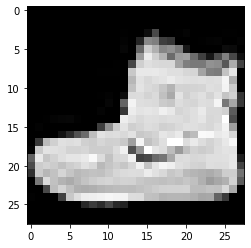

In [ ]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

In [ ]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

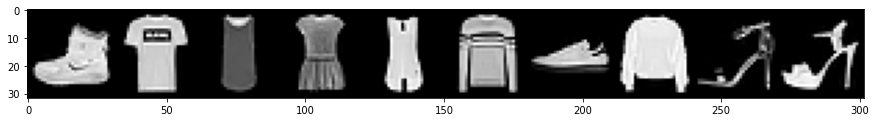

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")


## Construyendo una red neuronal convolucional

* Hacer una clase de modelo (FashionCNN en nuestro caso)
    * Hereda la clase nn.Module que es una súper clase para todas las redes neuronales en Pytorch.
    
* Nuestra Red Neural tiene las siguientes capas:
    * Dos capas secuenciales, cada una consta de las siguientes capas:
        * Capa de convolución que tiene un tamaño de kernel de 3 * 3, relleno = 1 (zero_padding) en la primera capa y relleno = 0 en la segunda. Zancada de 1 en ambas capas.
        * Capa de normalización de lotes.
        * Función de activación: ReLU.
        * Capa Max Pooling con tamaño de kernel de 2 * 2 y zancada 2.
     * Aplane la salida para una capa densa (también conocida como capa completamente conectada).
     * 3 capas totalmente conectadas con diferentes características de entrada/salida.
     * 1 capa de abandono que tiene probabilidad de clase p = 0,25.
  
     * Toda la funcionalidad se proporciona en el método directo que define el paso directo de CNN.
     * Nuestra imagen de entrada está cambiando de la siguiente manera:
        * Primera capa de convulación: entrada: 28 \* 28 \* 3, salida: 28 \* 28 \* 32
        * Primera capa Max Pooling: entrada: 28 \* 28 \* 32, salida: 14 \* 14 \* 32
        * Segunda capa Conv: entrada: 14 \* 14 \* 32, salida: 12 \* 12 \* 64
        * Segunda capa de agrupación máxima: 12 \* 12 \* 64, salida: 6 \* 6 \* 64
    * La capa final completamente conectada tiene 10 funciones de salida para 10 tipos de ropa.

> Vamos a implementar la red...



In [ ]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out


### Haciendo un modelo de nuestra clase CNN

* Creación de un objeto (modelo en el código)
* Transferirlo a GPU si está disponible.
* Definición de una función de pérdida. estamos usando CrossEntropyLoss() aquí.
* Uso del algoritmo de Adam para fines de optimización.



In [ ]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


## Entrenar la red y probarla en un conjunto de datos de prueba

In [ ]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


Iteration: 500, Loss: 0.5475422739982605, Accuracy: 86.25999450683594%
Iteration: 1000, Loss: 0.3030553162097931, Accuracy: 88.97000122070312%
Iteration: 1500, Loss: 0.30129170417785645, Accuracy: 88.04000091552734%
Iteration: 2000, Loss: 0.227613627910614, Accuracy: 88.87999725341797%
Iteration: 2500, Loss: 0.174112930893898, Accuracy: 89.82999420166016%
Iteration: 3000, Loss: 0.15197306871414185, Accuracy: 90.86000061035156%


### Visualización de la pérdida y precisión con iteraciones


In [ ]:
print(loss_list)
lista_perdida=[]
for i in loss_list:
  lista_perdida.append(i.cpu())

[tensor(0.5076, device='cuda:0'), tensor(0.4208, device='cuda:0'), tensor(0.4380, device='cuda:0'), tensor(0.5269, device='cuda:0'), tensor(0.3946, device='cuda:0'), tensor(0.3282, device='cuda:0'), tensor(0.3726, device='cuda:0'), tensor(0.4259, device='cuda:0'), tensor(0.6507, device='cuda:0'), tensor(0.5475, device='cuda:0'), tensor(0.3511, device='cuda:0'), tensor(0.2957, device='cuda:0'), tensor(0.3417, device='cuda:0'), tensor(0.2731, device='cuda:0'), tensor(0.3254, device='cuda:0'), tensor(0.3613, device='cuda:0'), tensor(0.2596, device='cuda:0'), tensor(0.3738, device='cuda:0'), tensor(0.2771, device='cuda:0'), tensor(0.3031, device='cuda:0'), tensor(0.4732, device='cuda:0'), tensor(0.3773, device='cuda:0'), tensor(0.3113, device='cuda:0'), tensor(0.2370, device='cuda:0'), tensor(0.3051, device='cuda:0'), tensor(0.2372, device='cuda:0'), tensor(0.2954, device='cuda:0'), tensor(0.2643, device='cuda:0'), tensor(0.2652, device='cuda:0'), tensor(0.3013, device='cuda:0'), tensor(0.

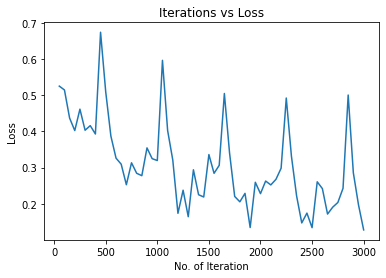

In [ ]:
plt.plot(iteration_list, lista_perdida)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [ ]:
#Guardo la informacion almacenada en los tensores en una lista para poder graficar
print(accuracy_list)
lista_accuracy=[]
#print(loss_list)
for i in accuracy_list:
  lista_accuracy.append(i.cpu())


[tensor(79.2200, device='cuda:0'), tensor(82.7100, device='cuda:0'), tensor(85.7600, device='cuda:0'), tensor(85.5900, device='cuda:0'), tensor(85.7400, device='cuda:0'), tensor(86.2400, device='cuda:0'), tensor(85.1900, device='cuda:0'), tensor(85.9600, device='cuda:0'), tensor(85.4700, device='cuda:0'), tensor(88.1700, device='cuda:0'), tensor(87.6100, device='cuda:0'), tensor(87.3300, device='cuda:0'), tensor(88.2600, device='cuda:0'), tensor(88.5800, device='cuda:0'), tensor(87.8200, device='cuda:0'), tensor(87.6800, device='cuda:0'), tensor(88.1700, device='cuda:0'), tensor(88.0800, device='cuda:0'), tensor(87.4100, device='cuda:0'), tensor(87.7400, device='cuda:0'), tensor(86.8200, device='cuda:0'), tensor(88.6600, device='cuda:0'), tensor(88.1800, device='cuda:0'), tensor(87.4100, device='cuda:0'), tensor(89.4500, device='cuda:0'), tensor(89.4800, device='cuda:0'), tensor(89.2300, device='cuda:0'), tensor(89.7000, device='cuda:0'), tensor(88.6700, device='cuda:0'), tensor(88.350

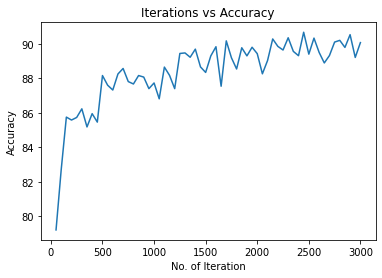

In [ ]:
plt.plot(iteration_list, lista_accuracy)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

### Mirando la precisión en cada clase de conjunto de datos FashionMNIST

In [ ]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 86.20%
Accuracy of Trouser: 98.00%
Accuracy of Pullover: 73.50%
Accuracy of Dress: 94.90%
Accuracy of Coat: 84.00%
Accuracy of Sandal: 96.00%
Accuracy of Shirt: 74.60%
Accuracy of Sneaker: 96.20%
Accuracy of Bag: 98.70%
Accuracy of Ankle Boot: 97.40%


### Imprimir la matriz de confusión

In [ ]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [ ]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     60000
           1       0.98      0.98      0.98     60000
           2       0.83      0.81      0.82     60000
           3       0.88      0.89      0.88     60000
           4       0.79      0.83      0.81     60000
           5       0.97      0.96      0.97     60000
           6       0.70      0.67      0.68     60000
           7       0.93      0.94      0.94     60000
           8       0.96      0.97      0.97     60000
           9       0.95      0.95      0.95     60000

    accuracy                           0.88    600000
   macro avg       0.88      0.88      0.88    600000
weighted avg       0.88      0.88      0.88    600000


